<a href="https://colab.research.google.com/github/Markushenriksson13/Markushenriksson-AAUBDS-2024/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Business problem:

Dataset: KIVA
Which countries show the highest demand for microloans, and how can loan allocation be optimized based on sectoral needs to maximize impact and efficiency?

Theory:
Countries with weaker economic infrastructures or greater population needs (such as developing countries) will exhibit higher demand for microloans, particularly in specific sectors like agriculture and food. By analyzing the loan amounts requested and funded across different sectors in various countries, it’s possible to identify patterns in demand and therefore maybe funding gaps. This information can be used to optimize loan allocation to sectors and countries that require more support or are more likely to generate economic returns by showcasing this for lenders.

To explore what lenders prefer to lend for, it can be analyzed by sectors, countries that attract the most lender engagement.



In [114]:
#Import the necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt # Importing the matplotlib library
import seaborn as sns

In [115]:
# Clone repository from GitHub
!git clone https://github.com/aaubs/ds-master.git


fatal: destination path 'ds-master' already exists and is not an empty directory.


In [116]:
import os

# Locate the correct filepath
os.chdir('/content/ds-master/data/assignments_datasets/KIVA')

# Check to see if the datasets are there
!ls



ds-master		   kiva_loans_part_1.csv.zip	  loan_theme_ids.csv
kiva_loans_part_0.csv	   kiva_loans_part_2.csv	  loan_theme_ids.csv.zip
kiva_loans_part_0.csv.zip  kiva_loans_part_2.csv.zip	  loan_themes_by_region.csv
kiva_loans_part_1.csv	   kiva_mpi_region_locations.csv  __MACOSX


In [117]:
import zipfile

# Extract the zipfiles
with zipfile.ZipFile('kiva_loans_part_0.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile('kiva_loans_part_1.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile('kiva_loans_part_2.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile('loan_theme_ids.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [118]:
#Load them into pandas dataframes
df_part_0 = pd.read_csv('kiva_loans_part_0.csv')
df_part_1 = pd.read_csv('kiva_loans_part_1.csv')
df_part_2 = pd.read_csv('kiva_loans_part_2.csv')
df_mpi_region = pd.read_csv('kiva_mpi_region_locations.csv')
df_loan_theme_ids = pd.read_csv('loan_theme_ids.csv')
df_loan_themes_by_region = pd.read_csv('loan_themes_by_region.csv')

In [119]:
#Check if the columns makes sense
df_part_0.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

## 2. Data Cleaning and manipulation

In [120]:
#Concatonating the dataset
data = pd.concat([df_part_0, df_part_1, df_part_2])
#Using head to get an overview of the data
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [121]:
#Dropping columns that are not needed
data = data.drop(['tags', 'use', 'posted_time', 'disbursed_time', 'funded_time'], axis=1)

In [122]:
#Making sure they are dropped correctly
data.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'term_in_months', 'lender_count', 'borrower_genders',
       'repayment_interval', 'date'],
      dtype='object')

In [123]:
#Getting overall info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   country_code        671197 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  term_in_months      671205 non-null  float64
 11  lender_count        671205 non-null  int64  
 12  borrower_genders    666984 non-null  object 
 13  repayment_interval  671205 non-null  object 
 14  date                671205 non-null  object 
dtypes: float64(4), int64(2), object(9)
memo

In [124]:
#Checking for missing values
data.isnull().sum()

,0
id,0
funded_amount,0
loan_amount,0
activity,0
sector,0
country_code,8
country,0
region,56800
currency,0
partner_id,13507


In [125]:
#Dropping missing values
data.dropna()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,247.0,12.0,12,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,247.0,11.0,14,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,IN,India,Maynaguri,INR,334.0,43.0,6,female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,PK,Pakistan,Lahore,PKR,247.0,11.0,8,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,PK,Pakistan,Abdul Hakeem,PKR,245.0,14.0,16,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221195,1340329,0.0,50.0,Livestock,Agriculture,GH,Ghana,Dansoman,GHS,231.0,13.0,0,"female, female",monthly,2017-07-25
221196,1340325,0.0,250.0,Livestock,Agriculture,GH,Ghana,Dansoman,GHS,231.0,13.0,0,female,monthly,2017-07-25
221198,1340331,0.0,75.0,Livestock,Agriculture,MX,Mexico,Iztacalco,MXN,294.0,13.0,0,female,monthly,2017-07-25
221199,1340318,0.0,25.0,Livestock,Agriculture,PY,Paraguay,Concepción,USD,58.0,13.0,0,female,monthly,2017-07-25


In [126]:
#Removing Outliers in loan amound column
# Calculate Z-scores
z_scores = zscore(data['loan_amount'])

# Get boolean array indicating the presence of outliers
# Using 2 & -2 z_scores to get 95% of data within 2 standard deviations
data['outlier_loan_amount'] = (z_scores > 2) | (z_scores < -2)


#Removing outliers
data_cleaned = data[~data['outlier_loan_amount']]

# Check amount of outliers
data['outlier_loan_amount'].sum()


26177

In [127]:
#Checking if they are removed
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645028 entries, 0 to 221204
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   645028 non-null  int64  
 1   funded_amount        645028 non-null  float64
 2   loan_amount          645028 non-null  float64
 3   activity             645028 non-null  object 
 4   sector               645028 non-null  object 
 5   country_code         645028 non-null  object 
 6   country              645028 non-null  object 
 7   region               594861 non-null  object 
 8   currency             645028 non-null  object 
 9   partner_id           635023 non-null  float64
 10  term_in_months       645028 non-null  float64
 11  lender_count         645028 non-null  int64  
 12  borrower_genders     641098 non-null  object 
 13  repayment_interval   645028 non-null  object 
 14  date                 645028 non-null  object 
 15  outlier_loan_amount  6

## 3. Descriptive Statistics

In [128]:
# Calculating basic statistics for the key variables
statistics = data_cleaned[['loan_amount', 'funded_amount', 'term_in_months', 'lender_count']].describe()
print(statistics)

         loan_amount  funded_amount  term_in_months   lender_count
count  645028.000000  645028.000000   645028.000000  645028.000000
mean      663.452129     624.770607       13.662257      17.666121
std       584.382610     563.284765        8.141323      16.676488
min        25.000000       0.000000        1.000000       0.000000
25%       250.000000     250.000000        8.000000       7.000000
50%       475.000000     450.000000       13.000000      12.000000
75%       900.000000     800.000000       14.000000      23.000000
max      3225.000000    3400.000000      141.000000     178.000000


In [129]:
#Creating plot to visualize descriptive statistics and therefore creating top 10 variables
#Aggregating/groupbying data by country
country_summary = data_cleaned.groupby('country').agg({
    'loan_amount': 'sum',
    'funded_amount': 'sum',
    'lender_count': 'sum'
}).reset_index()

# Creating top 10 variables
top_10_loan_amount = country_summary.nlargest(10, 'loan_amount')
top_10_funded_amount = country_summary.nlargest(10, 'funded_amount')
top_10_lender_count = country_summary.nlargest(10, 'lender_count')

In [130]:
#Printing the aggregation
print(top_10_loan_amount)

        country  loan_amount  funded_amount  lender_count
53  Philippines   55082525.0     54230900.0       1371504
30        Kenya   32127000.0     30045405.0        962569
19  El Salvador   26603650.0     23357725.0        693315
9      Cambodia   19577500.0     18556575.0        561109
52         Peru   18982900.0     18722850.0        393290
65   Tajikistan   14698375.0     13504650.0        401853
72       Uganda   14190050.0     13105450.0        373368
13     Colombia   14012750.0     12162400.0        360452
48     Pakistan   13034875.0     12336050.0        374809
17      Ecuador   12899900.0     12513550.0        310904


<ipython-input-131-6b3843ebca38>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_amount', y='country', data=top_10_loan_amount, palette='viridis')


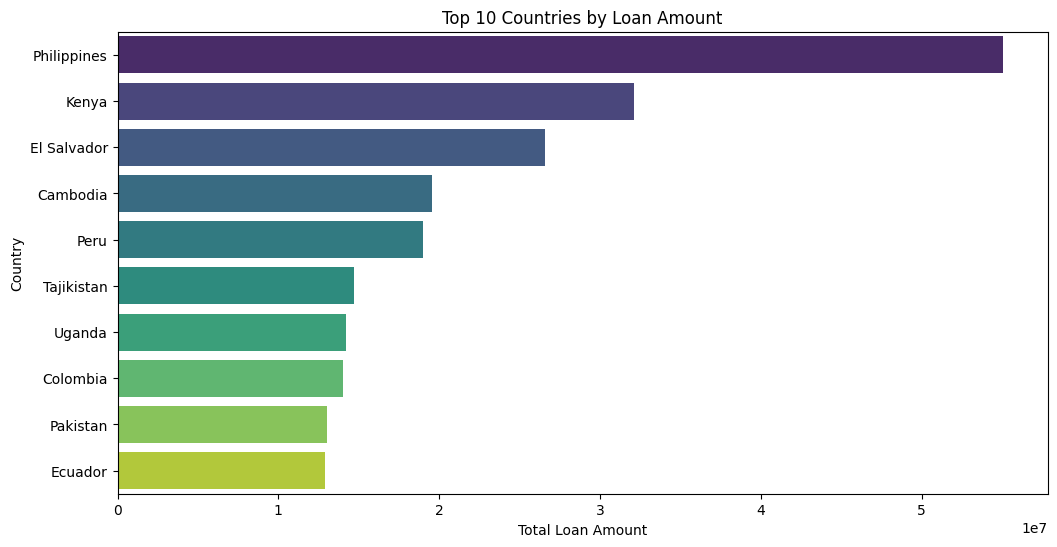

In [131]:
#Plotting the Top 10 Countries by Loan Amount
plt.figure(figsize=(12, 6))

sns.barplot(x='loan_amount', y='country', data=top_10_loan_amount, palette='viridis')
plt.title('Top 10 Countries by Loan Amount')
plt.xlabel('Total Loan Amount')
plt.ylabel('Country')
plt.show()


<ipython-input-132-7696c2537e72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lender_count', y='country', data=top_10_lender_count, palette='viridis')


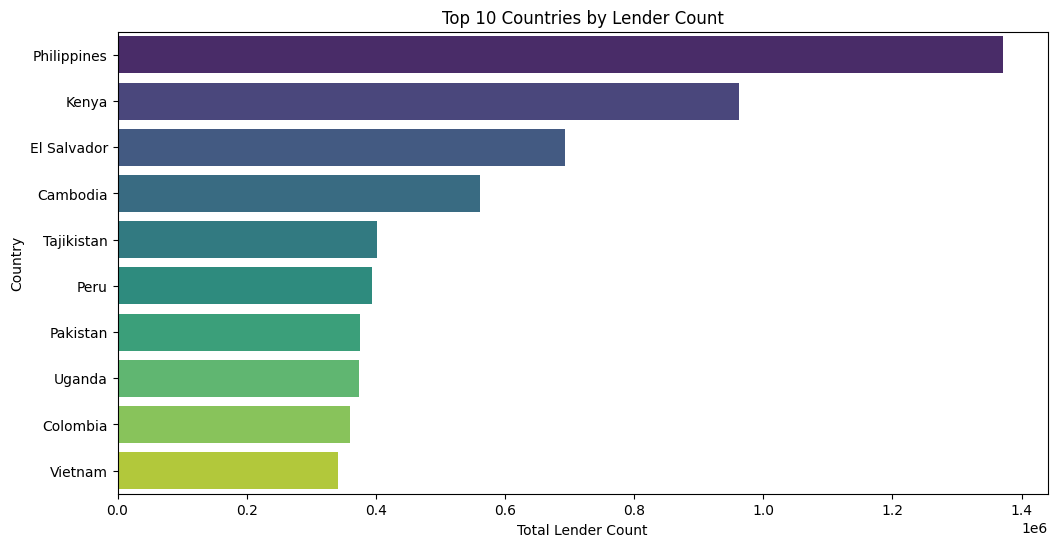

In [132]:
#Plotting the Top 10 Countries by Lender Count
plt.figure(figsize=(12, 6))

sns.barplot(x='lender_count', y='country', data=top_10_lender_count, palette='viridis')
plt.title('Top 10 Countries by Lender Count')
plt.xlabel('Total Lender Count')
plt.ylabel('Country')
plt.show()


## 4. Exploratory data analysis and visualization

In [133]:
# Creating Correlation Matrix with the 4 key variables and also adding 'partner_id
# Select the desired columns
columns = ['lender_count', 'funded_amount', 'loan_amount', 'term_in_months', 'partner_id']


# Calculating the correlation matrix using Pearson's method
correlation_matrix = data_cleaned[columns].corr()

# Print the correlation matrix
print(correlation_matrix)

                lender_count  funded_amount  loan_amount  term_in_months  \
lender_count        1.000000       0.862500     0.810865        0.290551   
funded_amount       0.862500       1.000000     0.948656        0.225959   
loan_amount         0.810865       0.948656     1.000000        0.264188   
term_in_months      0.290551       0.225959     0.264188        1.000000   
partner_id         -0.025654      -0.082397    -0.082870        0.081617   

                partner_id  
lender_count     -0.025654  
funded_amount    -0.082397  
loan_amount      -0.082870  
term_in_months    0.081617  
partner_id        1.000000  


Text(0.5, 1.0, 'Correlation Matrix of Key Values')

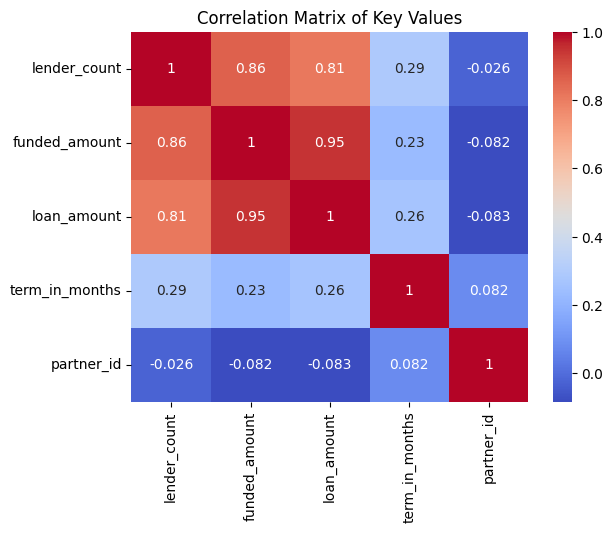

In [134]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm').set_title('Correlation Matrix of Key Values')

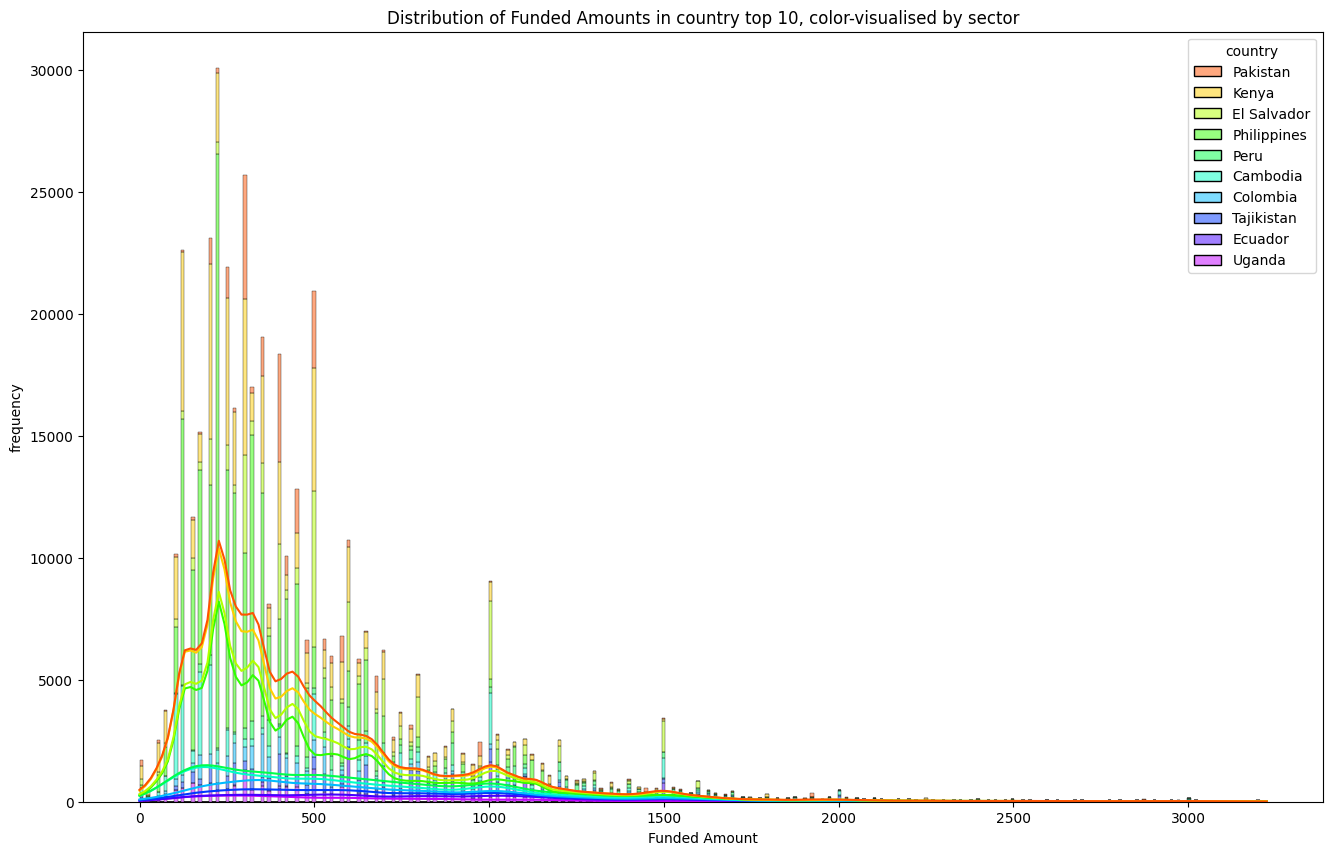

In [135]:
#Visualizing the loan amounts in different Countries
plt.figure(figsize=(16, 10))
sns.histplot(data=data_cleaned[data_cleaned['country'].isin(top_10_loan_amount['country'])], x='funded_amount', hue='country', palette='gist_rainbow', multiple='stack', kde=True) # Changed to data_cleaned and filtered for countries in top_10_countries
plt.title('Distribution of Funded Amounts in country top 10, color-visualised by sector')
plt.xlabel('Funded Amount')
plt.ylabel('frequency')
plt.show()

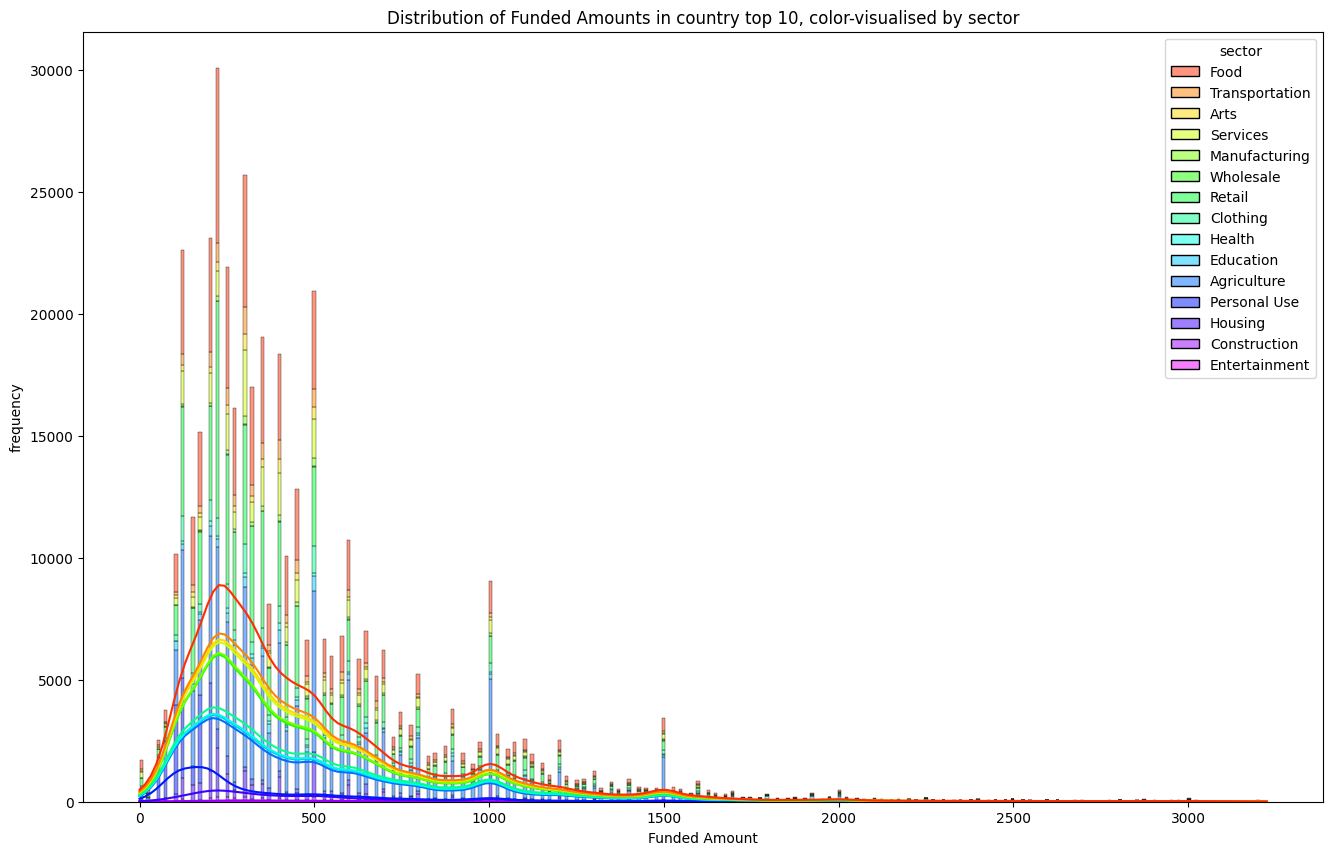

In [136]:
#Visualizing the loan amounts in different sectors
plt.figure(figsize=(16, 10))
sns.histplot(data=data_cleaned[data_cleaned['country'].isin(top_10_loan_amount['country'])], x='funded_amount', hue='sector', palette='gist_rainbow', multiple='stack', kde=True) # Changed to data_cleaned and filtered for countries in top_10_countries
plt.title('Distribution of Funded Amounts in country top 10, color-visualised by sector')
plt.xlabel('Funded Amount')
plt.ylabel('frequency')
plt.show()

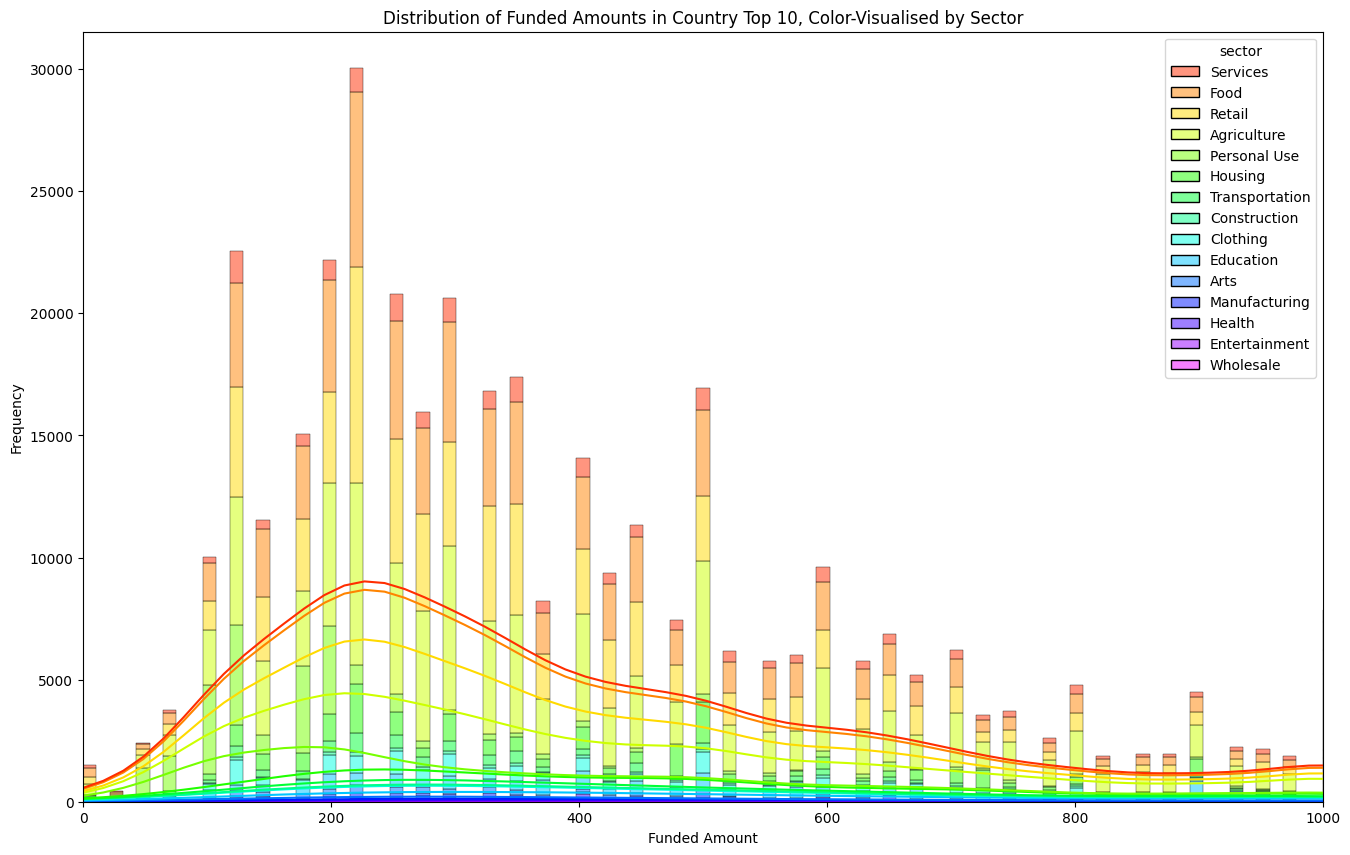

In [137]:
# Visualizing the loan amounts in different sectors, zoomed in to more thoroughly investigate the visualization
plt.figure(figsize=(16, 10))

# Plot with top 10 countries filtered and colored by sector
sns.histplot(
    data=data_cleaned[data_cleaned['country'].isin(top_10_countries['country'])],
    x='funded_amount',
    hue='sector',
    palette='gist_rainbow',
    multiple='stack',
    kde=True
)


plt.xlim(0, 1000)

plt.title('Distribution of Funded Amounts in Country Top 10, Color-Visualised by Sector')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()